In [957]:
"""
Yvonne's Code Review: 

- Your code needs more structure.  Here are a few suggestions: 
a) Divide your notebook into sections with clear headlines 
b) Try to combine lines of code into a cell (later into your code you put multiple lines togeher, which makes it more organized)
c) Avoid just showing your entire data frame, it makes code very hard to scroll through
"""

In [ ]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt

import pylab as plt

In [ ]:
#load the scarped data
world = pd.read_csv('michelin_reviews-world.csv')

In [ ]:
# check the data
world.head(10)

In [ ]:
# spliting the price columns by coma
(world['Price'].str.split(',',expand=True))[1087]
price=(world['Price'].str.split(',', expand=True))
price.columns = ['Price_from','Price to']

In [ ]:
world.iloc[3,1:2]

In [ ]:
price_world

In [ ]:
# checking the structure of the "Price" column
price_world=(world['Price'].str.split(',', expand=True))
print world.iloc[1,1]
x= world.iloc[1,1]
print (x.split(','))

In [ ]:
# counting the number of restaurants by the Michelin ratings
world3 = world.groupby('Michelin_star')
world3.agg('count')

In [1079]:
# import regular exprations package to clean the currency symbols
import re
# check if the command works
print re.search('^€|$|£', price_world.iloc[1,1]) != None

In [ ]:
# creating a lambda function to find the rows where the currency is different than Euro, USD, GBP and Swiss Frank
# the line that will shown might have 4 digits prices
currency = lambda s: re.search('[€|$|£|CHF]', s) != None

In [ ]:
world[world['Price'].apply(currency)]

In [ ]:
world['location'][1]
re.sub('[\n,.-]', ' ',world['location'][1])

In [ ]:
# import a package that changes a string to a dictionary- aimed to find the Lat ~ long in the location column
# which seems to be structured as a dictionary
import ast
#check if it works. It does
ast.literal_eval(world['location'][1])
text=location1['restaurants']['id']
text.split('|')[0:2]

In [ ]:
#create a lambda function to change the location string into a dictionary
to_dict= lambda s: ast.literal_eval(s)

In [ ]:
# apply the lambda function on the location column and inserting the result into a new dataframe
locations = world['location'].apply(to_dict)

In [ ]:
# creating a lambda function to extract the need value from the dictionary
dictionaries = lambda s: s['restaurants']['id']

In [ ]:
# apply the function on the locations dataframe and inserting the result to a new dataframe 
locations_coord = locations.apply(dictionaries)

In [ ]:
# creating a lambda function to split the lat ~ long by | and inserting the result to a new dataframe 
locations_clean = lambda s: s.split('|')[0:2]

In [ ]:
# apply the last split lambda function to the entire column and inserting the result to a new dataframe 
coords=locations_coord.apply(locations_clean)
coords

In [ ]:
# creating a new dataframe containg the raw michelin dataframe and the new lat~ long dataframe
world_new1= pd.concat([world,coords], axis=1)
# check the new dataframe
world_new1.head(2)

In [ ]:
#checking the srtucture of the new dataframe
list(world_new1)

In [1298]:
# extarct the price column from the origional dataframe
price = world['Price']

In [1299]:
# create a lambda function to replace the commas in empty spaces 
drop_commas= lambda s:re.sub(',', '', s)

In [ ]:
#applying the function on the price dataframe
price = price.apply(drop_commas)
price

In [ ]:
#create a lambda function to split the prices by the currency symbols
split_prices = lambda s :re.split('[\n,A-Z,¥,€,£,$]',s)

In [ ]:
#applying the function on the prices
price =price.apply(split_prices)

In [ ]:
#check the columns of the dataframe
price.columns()

In [ ]:
#applying the price data to a new dataframe
list1 = price 

In [ ]:
#checking the isdigits() command
text= ['','','56','','7']
[s for s in text if s.isdigit()]
#extract the digits from the nested list (that contains empty strings a item in the nested list)
prices =[[elm for elm in sub_list if elm.isdigit()] for sub_list in list1]

In [ ]:
#applying the prices to a new dataframe
prices1= pd.DataFrame(prices)
#changing the column names
prices1.columns = ['price_from','price to']
#checking the results
prices1.head()

In [ ]:
#merging the Michelin dataframe with the edited prices dataframe
world_new1= pd.concat([world_new1,prices1], axis=1)
world_new1.head()

In [ ]:
world_new= pd.concat([world_new,prices1], axis=1)

In [ ]:
# extract only the ranked restaurants
michelin_world =world_new1[(world_new1.Michelin_star== 'Two MICHELIN Stars : Excellent cooking, worth a detour!')
            | (world_new1.Michelin_star== 'One MICHELIN Star : High quality cooking, worth a stop!')
          | (world_new1.Michelin_star== 'Three MICHELIN Stars : Exceptional cuisine, worth a special journey!')
          | (world_new1.Michelin_star== 'Bib Gourmand: good quality, good value cooking: ≤ £28 / 40 € (IRE)')]

In [ ]:
# importing the geopy package - show the address by the lat~long
from geopy.geocoders import Nominatim

In [ ]:
# checking if the package works. it does.
geolocator = Nominatim()
location1 = geolocator.reverse([48.03139, 3.2960799])
location1

In [ ]:
# extract the colum containing the lat ~long data
countries = world_new1['lat ~ long']
countries

In [ ]:
#function to get the address from geopy
def get_country(x):
    geolocator = Nominatim()
    location = geolocator.reverse(x)
    print (location.address)

In [ ]:
#getting the address using geopy 
actual_address = world_new1['lat ~ long'].apply(get_country)

In [ ]:
# change columns names
michelin_world.columns = ['Cuisine',
 'Price',
 'Michelin_star_review',
 'Michelin_star',
 'Address',
 'Standard',
 'Review',
 'Retaurant_name',
 'location',
 'lat ~ long',
 'price_from',
 'price to']

In [ ]:
#reseting the index
michelin_world = michelin_world.reset_index(drop=True)

In [ ]:
#create a function to extract the country from the full address
get_country = lambda s: (re.split(',',s))[-1]

In [ ]:
# run the function on a columns
country = actual_address['full address'].apply(get_country)

In [ ]:
#change data type to a dataframe
country = pd.DataFrame(country)

In [ ]:
# change the country column name
country.column = ['country'] 

In [ ]:
# merge the county column to the full dataframe
michelin_full = pd.concat(['michelin_world','country'], axis =1)

In [854]:
michelin_full.head()

,Cuisine,Price,Michelin_star_review,Michelin_star,Address,Standard,Review,Retaurant_name,location,lat ~ long,price_from,price to,full address,country
0,Traditional cuisine,"€15,€28",‘Bibs’ are awarded for simple yet skilful cook...,"Bib Gourmand: good quality, good value cooking...","route de Vertou, 44690 Château-Thébaud",Good standard.,Dine amid the vineyards of the Nantes region! ...,Auberge La Gaillotire,"{""lastVisitedPois"":{""model"":""last_visited_pois...","[47.13114, -1.43327]",15,28,"D 58, La Mare Noire, Château-Thébaud, Nantes, ...",France
1,Creative,"€28,€70","Using top quality ingredients, dishes with dis...","One MICHELIN Star : High quality cooking, wort...","24 r. St-Manvieu, 14000 Caen",Simple standard.,"Established in 2013, close to the Abbaye aux H...",Initial,"{""lastVisitedPois"":{""model"":""last_visited_pois...","[49.183, -0.37119]",28,70,"20, Rue Saint-Manvieu, Caen, Calvados, Normand...",France
2,Modern cuisine,"€92,€124","Using top quality ingredients, dishes with dis...","One MICHELIN Star : High quality cooking, wort...","Bolzstr. 8, 70173 Stuttgart",Good standard.,Everything at 5 is unusual and unique. On the ...,5,"{""lastVisitedPois"":{""model"":""last_visited_pois...","[48.77997, 9.17788]",92,124,"3, Bolzstraße, Neue Vorstadt, Stuttgart-Mitte,...",Deutschland
3,Creative,"€65,€117","Using top quality ingredients, dishes with dis...","One MICHELIN Star : High quality cooking, wort...","An der Wasserburg 2, 38446 Wolfsburg-Neuhaus",Very good standard.,"The latest 'gem' at the hotel, Saphir's Energi...",Saphir,"{""lastVisitedPois"":{""model"":""last_visited_pois...","[52.41494, 10.85704]",65,117,"Zur Wasserburg, Burgallee, Neuhaus, Wolfsburg,...",Deutschland
4,Modern cuisine,"€69,€129","Using top quality ingredients, dishes with dis...","One MICHELIN Star : High quality cooking, wort...","Fritz-Erler-Str. 7, 53113 Bonn",Good standard. Our best addresses.,Set in the former coach house of Lower Saxony'...,EQUU,"{""lastVisitedPois"":{""model"":""last_visited_pois...","[50.71575, 7.127129]",69,129,"7, Fritz-Erler-Straße, Gronau, Stadtbezirk Bon...",Deutschland


In [ ]:
# finding the columns names
list(michelin_full)

In [915]:
# changing the names of the columns
michelin_full.columns=['Cuisine',
 'Price',
 'Michelin_star_review',
 'Michelin_star',
 'Address',
 'Standard',
 'Review',
 'Retaurant_name',
 'location',
 'lat ~ long',
 'price_from',
 'price_to',
 'full address',
 'country']

In [916]:
# check for missing values - the 8 missing values refer to fixed price restaurants
np.sum(michelin_full.isnull())

Cuisine                 0
Price                   0
Michelin_star_review    0
Michelin_star           0
Address                 0
Standard                0
Review                  0
Retaurant_name          0
location                0
lat ~ long              0
price_from              0
price_to                8
full address            0
country                 0
dtype: int64

In [884]:
# print the columns with the missing values- all of them have michelin stars with fixed menu
#sushi and japanese restaurants in China?
michelin_full.loc[michelin_full.isnull().any(axis=1),:]

,Cuisine,Price,Michelin_star_review,Michelin_star,Address,Standard,Review,Retaurant_name,location,lat ~ long,price_from,price to,full address,country
4629,Sushi,"HK$3,500",Our highest award is given for the superlative...,"Three MICHELIN Stars : Exceptional cuisine, wo...","The Mercer Hotel, 29 Jervois Street, Sheung Wa...",Simple standard. Our best addresses.,The owner's ambition is for his Hong Kong cust...,Sushi Shikon,"{""locationsAround"":{""model"":""locationsAround"",...","[22.28511, 114.15208]",3500,NaN,"Zoo Bar, 33, 蘇杭街 Jervois Street, 金鐘 Admiralty,...",中国
4640,Innovative,"HK$1,980","Using top quality ingredients, dishes with dis...","One MICHELIN Star : High quality cooking, wort...","GF, Oak Hill, 16 Wood Road, Wan Chai, Hong Kong",Good standard. Our best addresses.,This intimate Japanese restaurant is secreted ...,Wagyu Takumi,"{""locationsAround"":{""model"":""locationsAround"",...","[22.276512, 114.17718]",1980,NaN,"香港專業教育學院 (摩理臣山分校) IVE (Morrsion Hill), 6, 愛群道 ...",中国
4646,Japanese,"HK$2,180",The personality and talent of the chef and the...,"Two MICHELIN Stars : Excellent cooking, worth ...","101F, International Commerce Centre, 1 Austin ...",Good standard. Our best addresses.,The views are spectacular from its position on...,Ryu Gin,"{""locationsAround"":{""model"":""locationsAround"",...","[22.30331, 114.16021]",2180,NaN,"ICC, 1, 柯士甸道西 Austin Road West, 京士柏 King's Par...",中国
4652,Japanese,"HK$1,980","Using top quality ingredients, dishes with dis...","One MICHELIN Star : High quality cooking, wort...","263 Hollywood Road, Sheung Wan, Hong Kong",Good standard. Our best addresses.,Don't let the name confuse you - Wagyu beef is...,Wagyu Kaiseki Den,"{""touristAttractions"":{""model"":""pois/touristAt...","[22.285713, 114.147865]",1980,NaN,"荷李活道公園 Hollywood Road Park, 荷李活道 Hollywood Roa...",中国
4687,Innovative,HK$690,The personality and talent of the chef and the...,"Two MICHELIN Stars : Excellent cooking, worth ...","2F, The Pottinger Hotel, 21 Stanley Street, Ce...",Good standard.,"After three years at Ryu Gin, Chef Sato Hideak...",Ta Vie,"{""locationsAround"":{""model"":""locationsAround"",...","[22.282766, 114.15529]",690,NaN,"The envoy, 74, 皇后大道中 Queen's Road Central, 金鐘 ...",中国
4763,Sushi,SGD150,The personality and talent of the chef and the...,"Two MICHELIN Stars : Excellent cooking, worth ...","One Fullerton, #02-02B, 1 Fullerton Road, Sing...",Good standard.,"A couple of appetisers, four cooked dishes, te...",Shoukouwa,"{""locationsAround"":{""model"":""locationsAround"",...","[1.28637, 103.854]",150,NaN,"One Fullerton, 1, Collyer Quay, Chinatown, Raf...",Singapore
4767,Innovative,SGD128,The personality and talent of the chef and the...,"Two MICHELIN Stars : Excellent cooking, worth ...","41 Bukit Pasoh Road, Singapore",Very good standard. Our best addresses.,On three floors of a discreet 1922 townhouse i...,Andr,"{""locationsAround"":{""model"":""locationsAround"",...","[1.279515, 103.8404]",128,NaN,"41, Bukit Pasoh Road, Chinatown, Tanjong Pagar...",Singapore
4996,Innovative,"HK$1,280","Using top quality ingredients, dishes with dis...","One MICHELIN Star : High quality cooking, wort...","30F, The Wellington, 198 Wellington Street, Ce...",Good standard. Our best addresses.,This is where culinary theatrics raise counter...,VEA,"{""locationsAround"":{""model"":""locationsAround"",...","[22.284931, 114.15313]",1280,NaN,"Vea, 198, 威靈頓街 Wellington Street, 金鐘 Admiralty...",中国


In [841]:
#checking how many restaurant in each country
michelin_full.groupby(['country']).agg('count')

,Cuisine,Price,Michelin_star_review,Michelin_star,Address,Standard,Review,Retaurant_name,location,lat ~ long,price_from,price to,full address
country,,,,,,,,,,,,,
124,14,14,14,14,14,14,14,14,14,14,14,14,14
België - Belgique - Belgien,297,297,297,297,297,297,297,297,297,297,297,297,297
Brasil,48,48,48,48,48,48,48,48,48,48,48,48,48
China 中国,1,1,1,1,1,1,1,1,1,1,1,1,1
Danmark,35,35,35,35,35,35,35,35,35,35,35,35,35
Deutschland,731,731,731,731,731,731,731,731,731,731,731,731,731
España,417,417,417,417,417,417,417,417,417,417,417,417,417
Europe,18,18,18,18,18,18,18,18,18,18,18,18,18
France,1249,1249,1249,1249,1249,1249,1249,1249,1249,1249,1249,1249,1249


In [871]:
#change the prices columns to numeric columns
michelin_full[['price_from','price_to']] = michelin_full[['price_from','price to']].apply(pd.to_numeric)

In [963]:
# finding the number of restaurant ranked in each country
countries = michelin_full.groupby(['Michelin_star','country'])
#countries['price to'].agg([])
countries['Review'].agg(['count'])

count
Michelin_star                                      country                              
Bib Gourmand: good quality, good value cooking:...  124                                5
                                                    België - Belgique - Belgien      165
                                                    Brasil                            30
                                                    China 中国                           1
                                                    Danmark                           12
                                                    Deutschland                      453
                                                    España                           244
                                                    Europe                            14
                                                    France                           639
                                                    Ireland                           16
                                                    Italia                           260
                                                    Jersey                             1
                                                    Lëtzebuerg                        14
                                                    Magyarország                       3
                                                    Nederland                        134
                                                    Norge                              2
                                                    Polska                             4
                                                    Portugal                          34
                                                    Portugal (águas territoriais)      1
                                                    Singapore                         17
                                                    Suomi                              4
                                                    Sverige                           14
                                                    Svizra                           137
                                                    Switzerland                        1
                                                    UK                               124
                                                    United States of America         273
                                                    Österreich                        19
                                                    Česko                              7
                                                    Ελλάδα                             3
                                                    中国                                99
...                                                                                  ...
Three MICHELIN Stars : Exceptional cuisine, wor...  Monaco                             1
                                                    Nederland                          2
                                                    Norge                              1
                                                    Singapore                          1
                                                    Svizra                             3
                                                    UK                                 4
                                                    United States of America          14
                                                    中国                                 9
Two MICHELIN Stars : Excellent cooking, worth a...  124                                1
                                                    België - Belgique - Belgien       20
                                                    Brasil                             1
                                                    Danmark                            2
                                                    Deutschland               

In [967]:
# sublist of the world michelin guide for only the michelin stared restaurants
michelin_star = michelin_full.loc[~(michelin_full.Michelin_star=='Bib Gourmand: good quality, good value cooking: ≤ £28 / 40 € (IRE)')].reset_index()

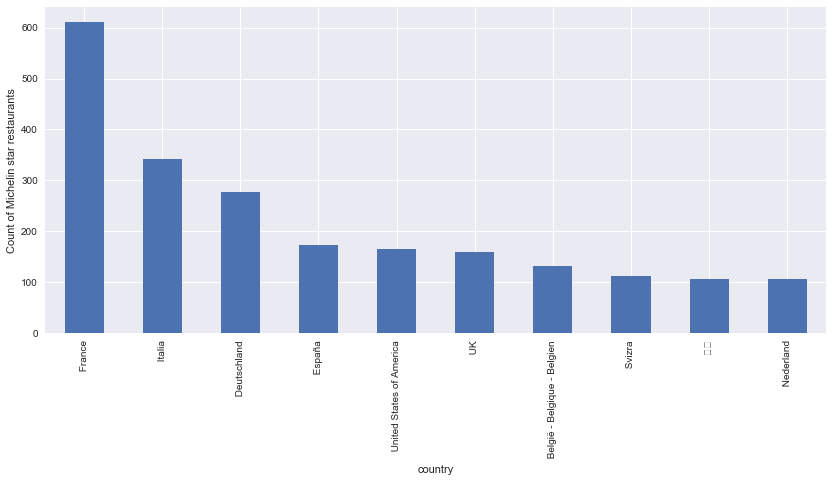

In [1024]:
# plotting the top ten countries by the number of michelin star restaurants in their teritories
plt.figure(figsize=(14,6))
michelin_star.groupby('country')['Cuisine'].agg('count').sort_values(ascending = False).head(10).plot.bar()
plt.ylabel('Count of Michelin star restaurants')

In [ ]:
#extracting european top contries by michelin star restaurants
europe=(michelin_star[(michelin_star['country']==(' France')) | 
                      (michelin_star['country']==(' Italia')) |
                     (michelin_star['country']==(' Deutschland')) |
                      (michelin_star['country']==(' España')) |
                      (michelin_star['country']==(' Svizra'))]).reset_index()
#removing the indexes of the parent tables
europe= europe.iloc[:,2:]
europe

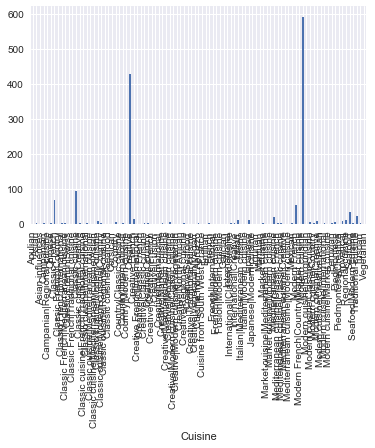

In [1177]:
europe2=europe[['Cuisine','country']]
europe2.groupby(['Cuisine'])['Cuisine'].agg('count').plot.bar()
#cuisine_Grid = sns.FacetGrid(europe, col='country', hue="country", palette="Set1", size=4)
#cuisine_Grid.map(sns.distplot, "Cuisine")

In [1179]:
# writing the dataframe into csv file
michelin_full.to_csv('michelin_full.csv', sep=',')


In [ ]:
#creat a review word breakdown for a the 3 stars word cloud
Reviews=(michelin_full['Review'].str.split(' ', expand=True))
star = michelin_full['Michelin_star']
Review_star = pd.concat([star,Reviews], axis=1)
Review_star_3 = michelin_star[(michelin_star['Michelin_star']==
                             'Three MICHELIN Stars : Exceptional cuisine, worth a special journey!')].reset_index()
review_star_3= Review_star_3.iloc[:,2:]
review_star_3

In [ ]:
#creat a review word breakdown for a the 2 stars word cloud
Reviews=(michelin_full['Review'].str.split(' ', expand=True))
star = michelin_full['Michelin_star']
Review_star = pd.concat([star,Reviews], axis=1)
Review_star_2 = michelin_star[(michelin_star['Michelin_star']==
                             'Two MICHELIN Stars : Excellent cooking, worth a detour!')].reset_index()
review_star_2= Review_star_2.iloc[:,2:]
review_star_2

In [ ]:
#creat a review word breakdown for a the 1 stars word cloud
Reviews=(michelin_full['Review'].str.split(' ', expand=True))
star = michelin_full['Michelin_star']
Review_star = pd.concat([star,Reviews], axis=1)
Review_star_1 = michelin_star[(michelin_star['Michelin_star']==
                             'One MICHELIN Star : High quality cooking, worth a stop!')].reset_index()
review_star_1= Review_star_1.iloc[:,2:]
review_star_1

In [1295]:
#creat a review word breakdown for a the bib stars word cloud
Reviews=(michelin_full['Review'].str.split(' ', expand=True))
star = michelin_full['Michelin_star']
Review_star = pd.concat([star,Reviews], axis=1)
Review_star_bib = Review_star[(Review_star['Michelin_star']==
                            'Bib Gourmand: good quality, good value cooking: ≤ £28 / 40 € (IRE)')].reset_index()    
review_bib= Review_star_bib.iloc[:,2:]
review_bib

,0,1,2,3,4,5,6,7,8,9,...,212,213,214,215,216,217,218,219,220,221
0,Dine,amid,the,vineyards,of,the,Nantes,region!,The,vines,...,None,None,None,None,None,None,None,None,None,None
1,It,is,hard,to,resist,the,charms,of,this,1751,...,None,None,None,None,None,None,None,None,None,None
2,Find,excellent,food,and,friendly,hosts,at,Werners.,Werner,Hhnlein's,...,None,None,None,None,None,None,None,None,None,None
3,This,charming,old,townhouse,hides,a,"friendly,",modern,restaurant,serving,...,None,None,None,None,None,None,None,None,None,None
4,Georg,and,Tanja,Fehrenbach's,warm,and,welcoming,restaurant,is,located,...,None,None,None,None,None,None,None,None,None,None
5,The,comfortable,dining,rooms,at,St.,Urban,bring,to,mind,...,None,None,None,None,None,None,None,None,None,None
6,At,Bscher,they,set,great,store,by,the,origin,of,...,None,None,None,None,None,None,None,None,None,None
7,The,contemporary,mix,of,regional,and,international,fare,on,offer,...,None,None,None,None,None,None,None,None,None,None
8,All,the,great,dishes,you,will,find,on,the,menu,...,None,None,None,None,None,None,None,None,None,None
9,Axel,Hobbach,cooks,for,the,diners,at,this,traditional,country-style,...,None,None,None,None,None,None,None,None,None,None


In [1280]:
review_1_star=review_star_1['Review'].str.split(' ',expand=True)
review_1_star

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,216
0,Established,in,"2013,",close,to,the,Abbaye,aux,Hommes,in,...,None,None,None,None,None,None,None,None,None,None
1,Everything,at,5,is,unusual,and,unique.,On,the,ground,...,None,None,None,None,None,None,None,None,None,None
2,The,latest,'gem',at,the,"hotel,",Saphir's,Energie,and,Kraft,...,None,None,None,None,None,None,None,None,None,None
3,Set,in,the,former,coach,house,of,Lower,Saxony's,historical,...,None,None,None,None,None,None,None,None,None,None
4,Whether,Mario,Gamba's,cuisine,is,Italian,with,a,French,influence,...,None,None,None,None,None,None,None,None,None,None
5,Whether,creative,or,"regional,",Thomas,Merkle,has,a,real,flair,...,None,None,None,None,None,None,None,None,None,None
6,Holger,Berens,has,a,proven,reputation,for,creating,flavoursome,fare,...,None,None,None,None,None,None,None,None,None,None
7,This,lovely,vaulted,restaurant,is,a,long-standing,favourite,on,Germany's,...,None,None,None,None,None,None,None,None,None,None
8,Start,with,an,aperitif,in,the,elegant,open-fired,drawing,"room,",...,None,None,None,None,None,None,None,None,None,None
9,The,classic,cuisine,at,Endtenfang,has,been,popular,with,diners,...,None,None,None,None,None,None,None,None,None,None


In [1206]:
review_bib=review_bib['Review'].str.split(' ',expand=True)

In [1296]:
#saving the reviews for the 3 stars restaurants
np.savetxt(r'review_3.txt', review_3_star.values, fmt='%s')
#saving the reviews for the 2 stars restaurants
np.savetxt(r'review_2.txt', review_2_star.values, fmt='%s')
#saving the reviews for the 1 stars restaurants
np.savetxt(r'review_1.txt', review_1_star.values, fmt='%s')
#saving the reviews for the bib stars restaurants
np.savetxt(r'review_bib.txt', review_bib.values, fmt='%s')


In [1282]:
#checking the dimentions of the rewards dataframe
review_1_star.shape

(1950, 217)

In [1265]:
#cleaning the reviews from unwanted characters and changing to lowercase for the 3 stars restaurants
f = open('review.txt', 'r')
lines = f.readlines()
f.close()
lines[1]
reviews=map(lambda s: s.lower(), lines)
reviews=map(lambda s: re.sub("[\n,0-9,.-]", '',s),reviews)
reviews=map(lambda s: re.sub('none', '',s),reviews)
reviews
np.savetxt(r'review_clean.txt',reviews, fmt='%s')

In [1278]:
#cleaning the reviews from unwanted characters for the 2 stars restaurants
f = open('review_2.txt', 'r')
lines2 = f.readlines()
f.close()
lines2[1]
reviews2=map(lambda s: s.lower(), lines2)
reviews2=map(lambda s: re.sub("[\n,0-9,.-]", '',s),reviews2)
reviews2=map(lambda s: re.sub('none', '',s),reviews2)
reviews2
np.savetxt(r'review2_clean.txt',reviews2, fmt='%s')

In [1297]:
#cleaning the reviews from unwanted characters for the bib grourmand restaurants
f = open('review_bib.txt', 'r')
lines1 = f.readlines()
f.close()
lines1[1]
reviews1=map(lambda s: s.lower(), lines1)
reviews1=map(lambda s: re.sub("[\n,0-9,.-]", '',s),reviews1)
reviews1=map(lambda s: re.sub('none', '',s),reviews1)
reviews1
np.savetxt(r'review_bib.txt',reviews1, fmt='%s')

In [1197]:
#save the reviews for the 3 Michelin star restaurants
Review_star_3.to_csv('michelin_review.csv', sep=',')